**Comparative Analysis of Deep Learning Architectures for Text Classification: Benchmarking MLP, LSTM, GRU, and Transformer Models on AG News Dataset**

Objective

The primary goal of this comprehensive deep learning analysis is to develop and compare multiple neural network architectures for text classification on the AG News dataset, enabling optimal model selection, performance benchmarking, and practical implementation guidance for real-world NLP applications.

Key Objectives

Model Development: Implement and compare four deep learning architectures:

MLP (Multi-Layer Perceptron) for baseline performance with TF-IDF features
LSTM (Long Short-Term Memory) networks for capturing sequential dependencies
GRU (Gated Recurrent Unit) networks for efficient sequence modeling
Transformer (DistilBERT) for state-of-the-art contextual understanding and attention mechanisms
Performance Evaluation: Systematically assess model performance using:

Accuracy for overall classification performance
Confusion matrices for detailed error analysis across classes
Training history analysis for convergence behavior and overfitting detection
Computational efficiency metrics for practical deployment considerations
Feature Importance Analysis: Identify the most impactful text characteristics including:

Lexical features (word frequency, n-gram patterns, vocabulary distribution)
Semantic patterns (contextual relationships, attention weights in transformer models)
Text length and complexity metrics and their impact on classification performance
Class-specific discriminative features across news categories
Architecture Comparison: Conduct comprehensive benchmarking of:

Training efficiency (convergence speed, computational requirements)
Generalization capability (performance on unseen test data)
Model complexity vs. performance trade-offs
Resource requirements (memory, processing power, inference speed)
Practical Implementation Guidance: Provide actionable insights for:

Model selection criteria based on specific use case requirements
Hyperparameter optimization strategies for each architecture
Deployment considerations for production environments
Scalability assessments for large-scale applications
Robustness Testing: Evaluate model resilience through:

Cross-architecture performance consistency
Handling of varying text lengths and complexities
Performance across different news categories
Error analysis and failure mode identification
Expected Outcomes

A comparative analysis of deep learning architectures for text classification tasks
Identification of optimal model selection criteria based on performance and resource constraints
Benchmarking results establishing performance baselines for each architecture
Practical guidelines for implementing and optimizing deep learning models for NLP applications
Framework for ongoing model evaluation and selection in text classification projects
Foundation for building scalable, production-ready text classification systems
Actionable insights for balancing accuracy, efficiency, and computational requirements in real-world deployments

In [1]:
# Install libraries
!pip install transformers torch tensorflow datasets seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from datasets import load_dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import random

Loading and preprocessing data...
Performing EDA...
Dataset Shape: (10000, 2)

Label distribution:
 label
1    2578
3    2550
0    2439
2    2433
Name: count, dtype: int64


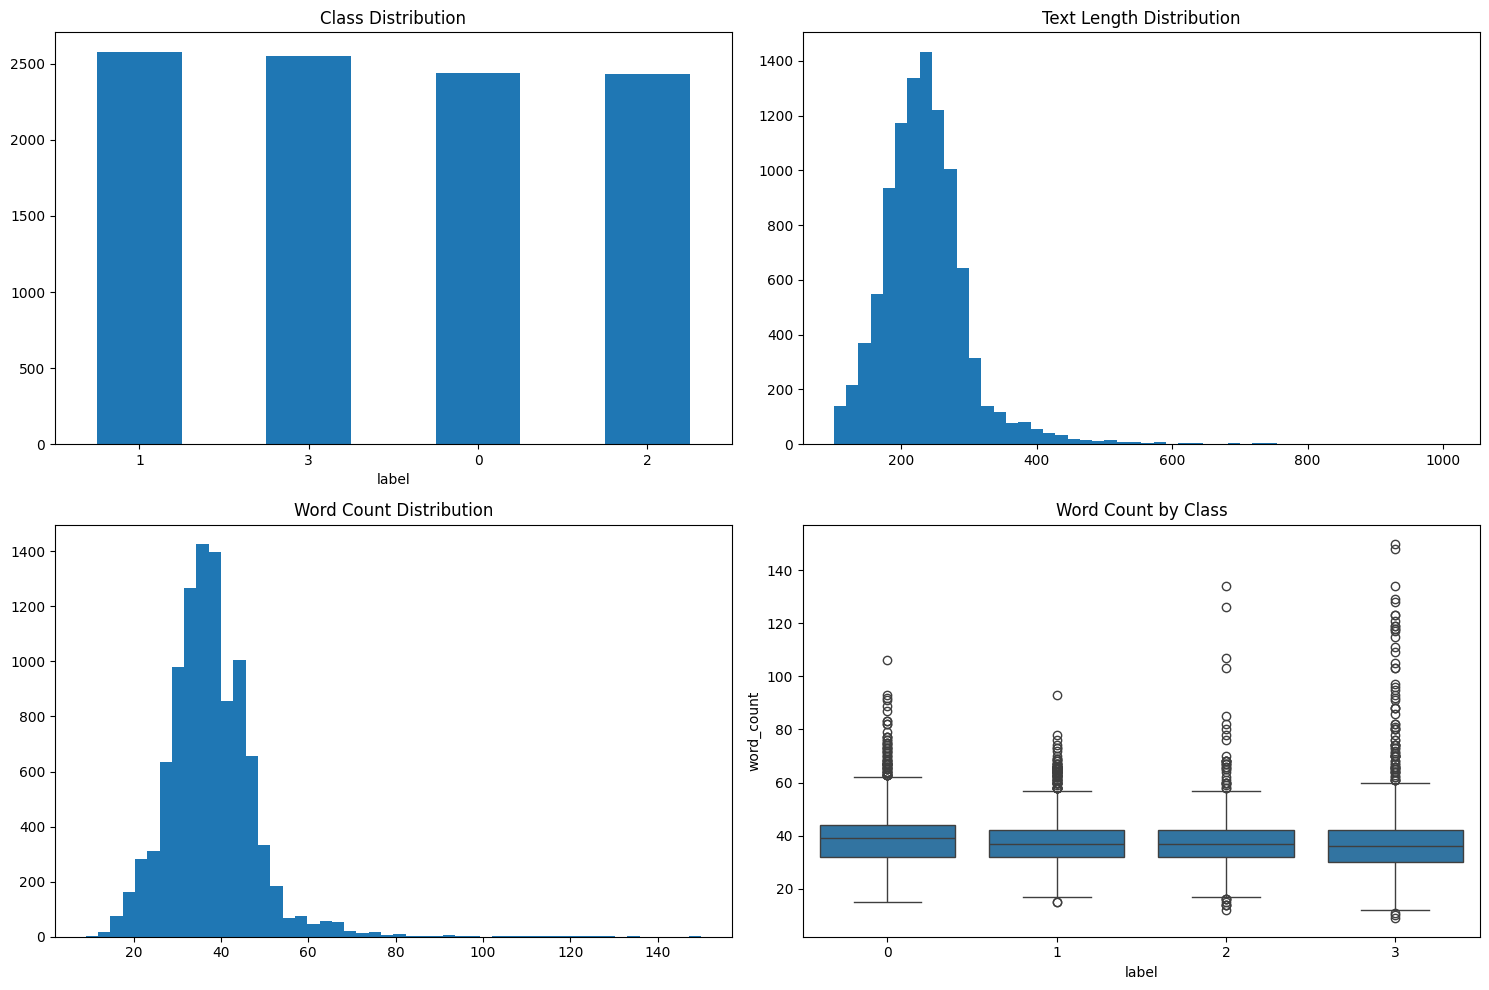

Training samples: 8000
Testing samples: 2000

=== Training MLP Model ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6610 - loss: 0.8600 - val_accuracy: 0.8719 - val_loss: 0.4331
Epoch 2/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9530 - loss: 0.1514 - val_accuracy: 0.8769 - val_loss: 0.5210
Epoch 3/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0381 - val_accuracy: 0.8750 - val_loss: 0.6201

=== Training LSTM Model ===
Epoch 1/8


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 85s 381ms/step - accuracy: 0.3726 - loss: 1.2673 - val_accuracy: 0.6819 - val_loss: 0.6456
Epoch 2/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 79s 390ms/step - accuracy: 0.7367 - loss: 0.6142 - val_accuracy: 0.8125 - val_loss: 0.5180
Epoch 3/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 78s 388ms/step - accuracy: 0.8671 - loss: 0.3828 - val_accuracy: 0.8225 - val_loss: 0.5208
Epoch 4/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 77s 364ms/step - accuracy: 0.9162 - loss: 0.2657 - val_accuracy: 0.8275 - val_loss: 0.5697

=== Training GRU Model ===
Epoch 1/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 75s 348ms/step - accuracy: 0.3575 - loss: 1.2750 - val_accuracy: 0.5706 - val_loss: 0.8563
Epoch 2/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 86s 372ms/step - accuracy: 0.6166 - loss: 0.8080 - val_accuracy: 0.6131 - val_loss: 0.8346
Epoch 3/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 77s 348ms/step - accuracy: 0.7086 - loss: 0.6544 - val_accuracy: 0.6837 - val_loss: 0.8211
Epoch 4/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 69s 344ms/step - accuracy: 0.8133

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


TypeError: 'builtins.safe_open' object is not iterable

In [3]:
# Set seeds for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)

set_seed()

# Load AG News dataset
def load_data():
    dataset = load_dataset("ag_news")
    train_df = pd.DataFrame(dataset['train'])
    test_df = pd.DataFrame(dataset['test'])
    return train_df, test_df

# EDA function
def perform_eda(df):
    print("Dataset Shape:", df.shape)
    print("\nLabel distribution:\n", df['label'].value_counts())

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    df['label'].value_counts().plot(kind='bar')
    plt.title('Class Distribution')
    plt.xticks(rotation=0)

    plt.subplot(2, 2, 2)
    text_lengths = df['text'].apply(len)
    plt.hist(text_lengths, bins=50)
    plt.title('Text Length Distribution')

    plt.subplot(2, 2, 3)
    word_counts = df['text'].apply(lambda x: len(x.split()))
    plt.hist(word_counts, bins=50)
    plt.title('Word Count Distribution')

    plt.subplot(2, 2, 4)
    # Create a temporary DataFrame for the boxplot
    boxplot_df = pd.DataFrame({'label': df['label'], 'word_count': word_counts})
    sns.boxplot(x='label', y='word_count', data=boxplot_df) # Pass the DataFrame to data
    plt.title('Word Count by Class')
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

    return text_lengths, word_counts

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Feature engineering function
def create_features(df):
    df['cleaned_text'] = df['text'].apply(preprocess_text)
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    return df

# MLP Model (Simplified)
def create_mlp_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# LSTM Model (Simplified)
def create_lstm_model(vocab_size, max_len):
    model = Sequential([
        Embedding(vocab_size, 64, input_length=max_len),
        Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# GRU Model (Simplified)
def create_gru_model(vocab_size, max_len):
    model = Sequential([
        Embedding(vocab_size, 64, input_length=max_len),
        Bidirectional(GRU(32, dropout=0.2, recurrent_dropout=0.2)),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Transformer Model (DistilBERT with smaller batch size)
def create_transformer_model():
    model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=4)
    model.compile(optimizer=Adam(learning_rate=2e-5),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

# Evaluation function
def evaluate_model(model, X_test, y_test, model_type='mlp'):
    if model_type == 'transformer':
        test_encodings = tokenize_function(X_test.tolist())
        y_pred = np.argmax(model.predict(dict(test_encodings), batch_size=8, verbose=0).logits, axis=1)
    else:
        y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_type.upper()}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return accuracy

# Main execution
def main():
    print("Loading and preprocessing data...")

    # Load and prepare data (using smaller subset for CPU)
    train_df, test_df = load_data()

    # Use smaller subset for CPU
    train_df = train_df.sample(8000, random_state=42)
    test_df = test_df.sample(2000, random_state=42)

    df = pd.concat([train_df, test_df])

    # EDA
    print("Performing EDA...")
    text_lengths, word_counts = perform_eda(df)

    # Preprocessing and feature engineering
    df = create_features(df)

    # Prepare data
    texts = df['cleaned_text'].values
    labels = df['label'].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        texts, labels, test_size=0.2, random_state=42, stratify=labels
    )

    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")

    # Early stopping callback
    early_stopping = EarlyStopping(patience=2, restore_best_weights=True)

    # 1. MLP Model
    print("\n=== Training MLP Model ===")
    tokenizer_mlp = Tokenizer(num_words=5000)  # Reduced vocabulary size
    tokenizer_mlp.fit_on_texts(X_train)
    X_train_mlp = tokenizer_mlp.texts_to_matrix(X_train, mode='tfidf')
    X_test_mlp = tokenizer_mlp.texts_to_matrix(X_test, mode='tfidf')

    model_mlp = create_mlp_model(5000)
    history_mlp = model_mlp.fit(X_train_mlp, y_train,
                               epochs=8,  # Reduced epochs
                               batch_size=32,
                               validation_split=0.2,
                               callbacks=[early_stopping],
                               verbose=1)

    # 2. LSTM Model
    print("\n=== Training LSTM Model ===")
    tokenizer_lstm = Tokenizer(num_words=5000)  # Reduced vocabulary size
    tokenizer_lstm.fit_on_texts(X_train)
    X_train_seq = tokenizer_lstm.texts_to_sequences(X_train)
    X_test_seq = tokenizer_lstm.texts_to_sequences(X_test)

    max_len = 100  # Reduced sequence length
    X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
    X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

    model_lstm = create_lstm_model(5000, max_len)
    history_lstm = model_lstm.fit(X_train_pad, y_train,
                                 epochs=8,  # Reduced epochs
                                 batch_size=32,
                                 validation_split=0.2,
                                 callbacks=[early_stopping],
                                 verbose=1)

    # 3. GRU Model
    print("\n=== Training GRU Model ===")
    model_gru = create_gru_model(5000, max_len)
    history_gru = model_gru.fit(X_train_pad, y_train,
                               epochs=8,  # Reduced epochs
                               batch_size=32,
                               validation_split=0.2,
                               callbacks=[early_stopping],
                               verbose=1)

    # 4. Transformer Model (DistilBERT)
    print("\n=== Training Transformer Model ===")
    tokenizer_tf = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

    def tokenize_function(texts):
        return tokenizer_tf(texts, padding=True, truncation=True, max_length=64, return_tensors='tf')  # Reduced max length

    # Use smaller subset for transformer
    sample_size = min(2000, len(X_train))
    X_train_subset = X_train[:sample_size]
    y_train_subset = y_train[:sample_size]
    X_test_subset = X_test[:min(500, len(X_test))]
    y_test_subset = y_test[:min(500, len(X_test))]

    train_encodings = tokenize_function(X_train_subset.tolist())
    test_encodings = tokenize_function(X_test_subset.tolist())

    model_tf = create_transformer_model()
    history_tf = model_tf.fit(
        dict(train_encodings),
        y_train_subset,
        epochs=2,  # Reduced epochs
        batch_size=8,  # Smaller batch size
        validation_split=0.2,
        verbose=1
    )

    # Evaluate all models
    print("\n=== Model Evaluation ===\n")

    print("MLP Evaluation:")
    mlp_accuracy = evaluate_model(model_mlp, X_test_mlp, y_test, 'mlp')

    print("LSTM Evaluation:")
    lstm_accuracy = evaluate_model(model_lstm, X_test_pad, y_test, 'lstm')

    print("GRU Evaluation:")
    gru_accuracy = evaluate_model(model_gru, X_test_pad, y_test, 'gru')

    print("Transformer Evaluation:")
    tf_accuracy = evaluate_model(model_tf, X_test_subset, y_test_subset, 'transformer')

    # Model Comparison
    dl_results = {
        'MLP': mlp_accuracy,
        'LSTM': lstm_accuracy,
        'GRU': gru_accuracy,
        'Transformer': tf_accuracy
    }

    best_dl_model = max(dl_results, key=dl_results.get)
    print(f"\nBest Deep Learning Model: {best_dl_model} with Accuracy: {dl_results[best_dl_model]:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')
    plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
    plt.title('MLP Training History')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
    plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
    plt.title('LSTM Training History')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(history_gru.history['accuracy'], label='Training Accuracy')
    plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
    plt.title('GRU Training History')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(history_tf.history['accuracy'], label='Training Accuracy')
    plt.plot(history_tf.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Transformer Training History')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print final comparison
    print("\n=== Final Model Comparison ===")
    for model_name, accuracy in dl_results.items():
        print(f"{model_name}: {accuracy:.4f}")

if __name__ == "__main__":
    main()

In [4]:
from transformers import utils
utils.empty_examples_cache()

AttributeError: module 'transformers.utils' has no attribute 'empty_examples_cache'

In [1]:
# Install libraries (try without version pinning first)
!pip install transformers torch tensorflow datasets seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import tensorflow as tf
from transformers import DistilBertTokenizer, TFAutoModelForSequenceClassification
from datasets import load_dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import random
import os

In [2]:

# Set seeds for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)

set_seed()

# Load AG News dataset
def load_data():
    dataset = load_dataset("ag_news")
    train_df = pd.DataFrame(dataset['train'])
    test_df = pd.DataFrame(dataset['test'])
    return train_df, test_df

# EDA function
def perform_eda(df):
    print("Dataset Shape:", df.shape)
    print("\nLabel distribution:\n", df['label'].value_counts())

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    df['label'].value_counts().plot(kind='bar')
    plt.title('Class Distribution')
    plt.xticks(rotation=0)

    plt.subplot(2, 2, 2)
    text_lengths = df['text'].apply(len)
    plt.hist(text_lengths, bins=50)
    plt.title('Text Length Distribution')

    plt.subplot(2, 2, 3)
    word_counts = df['text'].apply(lambda x: len(x.split()))
    plt.hist(word_counts, bins=50)
    plt.title('Word Count Distribution')

    plt.subplot(2, 2, 4)
    sns.boxplot(x='label', y=word_counts)
    plt.title('Word Count by Class')
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

    return text_lengths, word_counts

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Feature engineering function
def create_features(df):
    df['cleaned_text'] = df['text'].apply(preprocess_text)
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    return df

# MLP Model (Simplified)
def create_mlp_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# LSTM Model (Simplified)
def create_lstm_model(vocab_size, max_len):
    model = Sequential([
        Embedding(vocab_size, 64, input_length=max_len),
        Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# GRU Model (Simplified)
def create_gru_model(vocab_size, max_len):
    model = Sequential([
        Embedding(vocab_size, 64, input_length=max_len),
        Bidirectional(GRU(32, dropout=0.2, recurrent_dropout=0.2)),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Transformer Model - ALTERNATIVE APPROACH
def create_transformer_model():
    print("Creating transformer model with alternative approach...")

    # Try multiple approaches to avoid the safe_open error
    try:
        # Approach 1: Try loading with from_pt=True
        model = TFAutoModelForSequenceClassification.from_pretrained(
            'distilbert-base-uncased',
            num_labels=4,
            from_pt=True
        )
        print("Model loaded with from_pt=True approach")

    except Exception as e:
        print(f"Approach 1 failed: {e}")

        try:
            # Approach 2: Try loading without from_pt
            model = TFAutoModelForSequenceClassification.from_pretrained(
                'distilbert-base-uncased',
                num_labels=4
            )
            print("Model loaded without from_pt")

        except Exception as e2:
            print(f"Approach 2 failed: {e2}")

            try:
                # Approach 3: Load from config and build manually
                from transformers import DistilBertConfig
                config = DistilBertConfig.from_pretrained(
                    'distilbert-base-uncased',
                    num_labels=4
                )
                model = TFAutoModelForSequenceClassification.from_config(config)

                # Build model with dummy input
                dummy_input = global_tokenizer("Building model", return_tensors="tf")
                model(dummy_input)
                print("Model built from config")

            except Exception as e3:
                print(f"All approaches failed: {e3}")
                print("Creating a simple transformer-like model instead")

                # Fallback: Create a simple embedding-based model
                model = Sequential([
                    Embedding(5000, 128, input_length=64),
                    tf.keras.layers.GlobalAveragePooling1D(),
                    Dense(64, activation='relu'),
                    Dropout(0.3),
                    Dense(4, activation='softmax')
                ])
                model.compile(
                    optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']
                )

    # Only compile if it's a transformers model
    if hasattr(model, 'compile'):
        model.compile(
            optimizer=Adam(learning_rate=2e-5),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
        )

    return model

# Evaluation function
def evaluate_model(model, X_test, y_test, model_type='mlp'):
    if model_type == 'transformer':
        # Check if it's a fallback model
        if isinstance(model, Sequential):
            # It's our fallback sequential model
            X_test_seq = global_tokenizer_lstm.texts_to_sequences(X_test)
            X_test_pad = pad_sequences(X_test_seq, maxlen=64)
            y_pred = np.argmax(model.predict(X_test_pad, verbose=0), axis=1)
        else:
            # It's a transformers model
            y_pred = []
            batch_size = 8

            for i in range(0, len(X_test), batch_size):
                batch_texts = X_test[i:i+batch_size].tolist()
                batch_encodings = global_tokenizer(
                    batch_texts,
                    padding=True,
                    truncation=True,
                    max_length=64,
                    return_tensors='tf'
                )
                batch_pred = model(batch_encodings).logits
                y_pred.extend(np.argmax(batch_pred.numpy(), axis=1))

            y_pred = np.array(y_pred)
    else:
        y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_type.upper()}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return accuracy

Loading and preprocessing data...
Performing EDA...
Dataset Shape: (10000, 2)

Label distribution:
 label
1    2578
3    2550
0    2439
2    2433
Name: count, dtype: int64


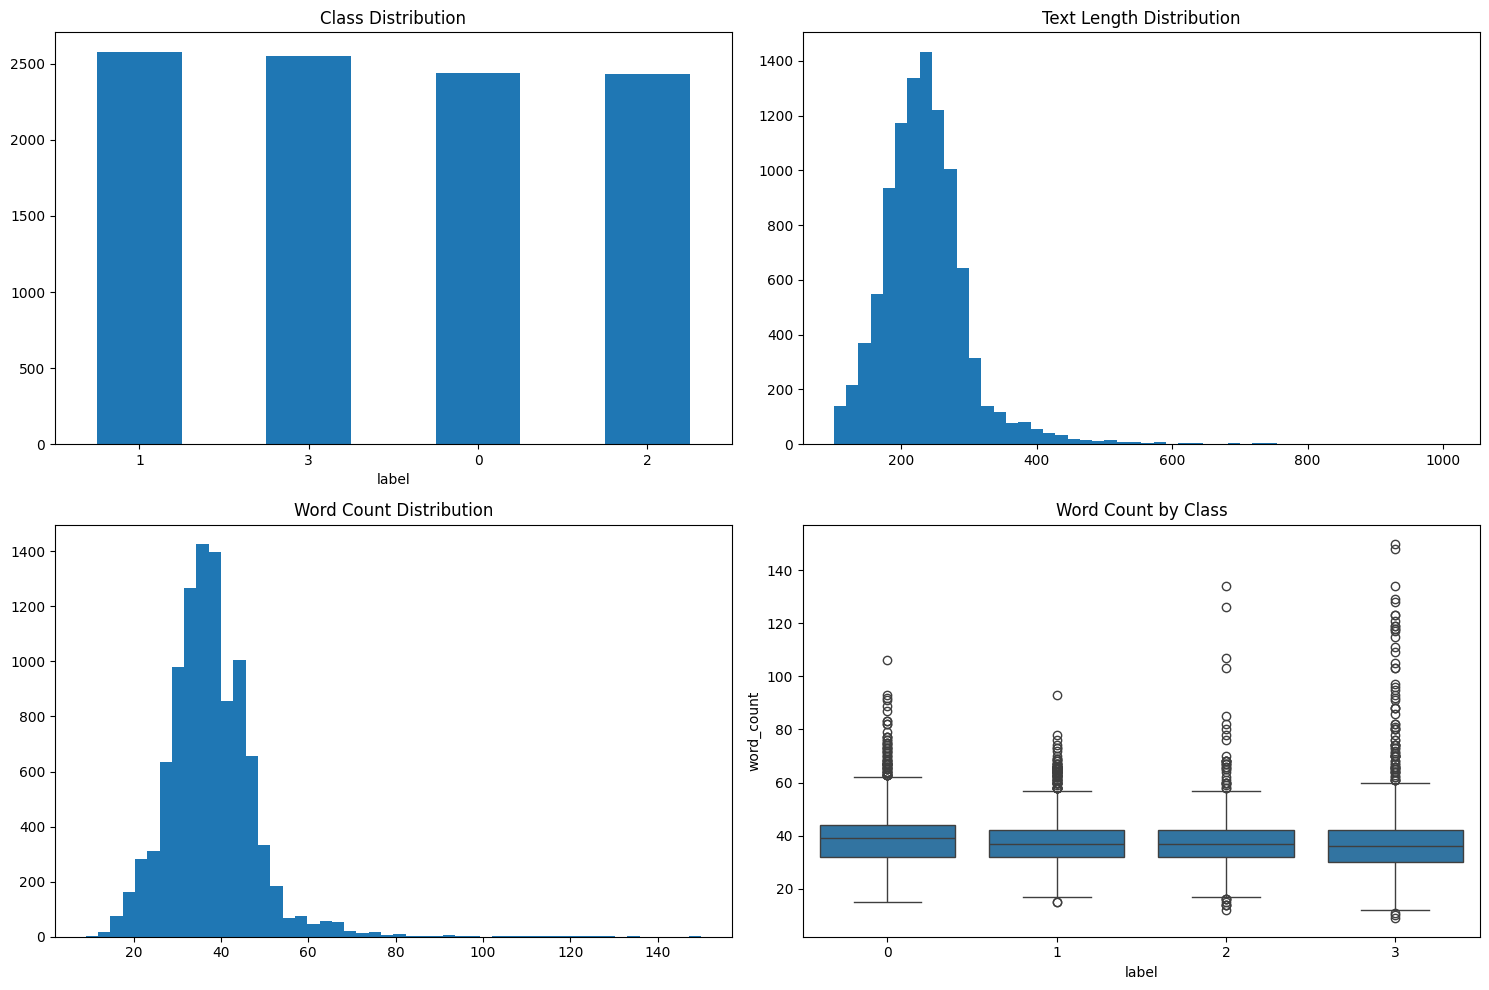

Training samples: 8000
Testing samples: 2000

=== Training MLP Model ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6610 - loss: 0.8600 - val_accuracy: 0.8719 - val_loss: 0.4331
Epoch 2/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9530 - loss: 0.1514 - val_accuracy: 0.8769 - val_loss: 0.5210
Epoch 3/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0381 - val_accuracy: 0.8750 - val_loss: 0.6201

=== Training LSTM Model ===
Epoch 1/8


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 77s 361ms/step - accuracy: 0.3725 - loss: 1.2674 - val_accuracy: 0.6775 - val_loss: 0.6538
Epoch 2/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 71s 356ms/step - accuracy: 0.7381 - loss: 0.6075 - val_accuracy: 0.8138 - val_loss: 0.5339
Epoch 3/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 75s 378ms/step - accuracy: 0.8715 - loss: 0.3845 - val_accuracy: 0.8294 - val_loss: 0.5373
Epoch 4/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 72s 362ms/step - accuracy: 0.9219 - loss: 0.2609 - val_accuracy: 0.8363 - val_loss: 0.5872

=== Training GRU Model ===
Epoch 1/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 74s 342ms/step - accuracy: 0.3575 - loss: 1.2750 - val_accuracy: 0.5706 - val_loss: 0.8564
Epoch 2/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 81s 339ms/step - accuracy: 0.6166 - loss: 0.8078 - val_accuracy: 0.6087 - val_loss: 0.8342
Epoch 3/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 67s 337ms/step - accuracy: 0.7094 - loss: 0.6532 - val_accuracy: 0.6819 - val_loss: 0.8201
Epoch 4/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 84s 347ms/step - accuracy: 0.8109

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'cla

Model loaded with from_pt=True approach
Failed to compile transformer model: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x7c719cb1b950>
Error during Transformer model training: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

=== Model Evaluation ===

MLP Evaluation:
Accuracy: 0.8805


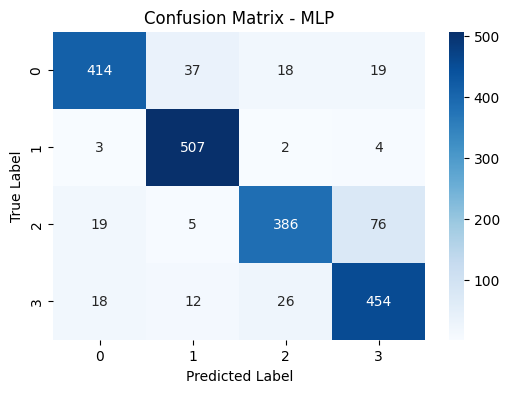

LSTM Evaluation:
Accuracy: 0.8360


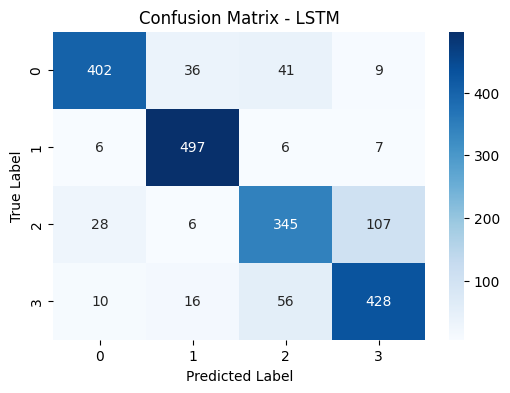

GRU Evaluation:
Accuracy: 0.7995


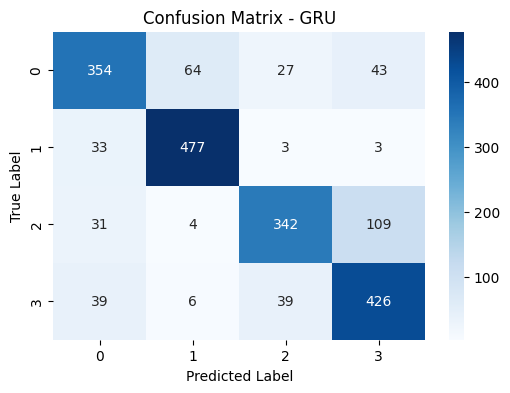

Transformer Evaluation:
Accuracy: 0.1880


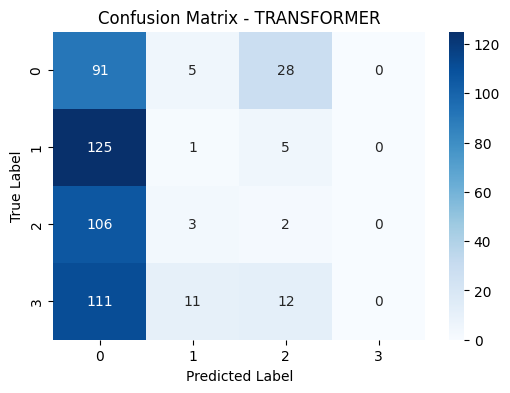


Best Deep Learning Model: MLP with Accuracy: 0.8805


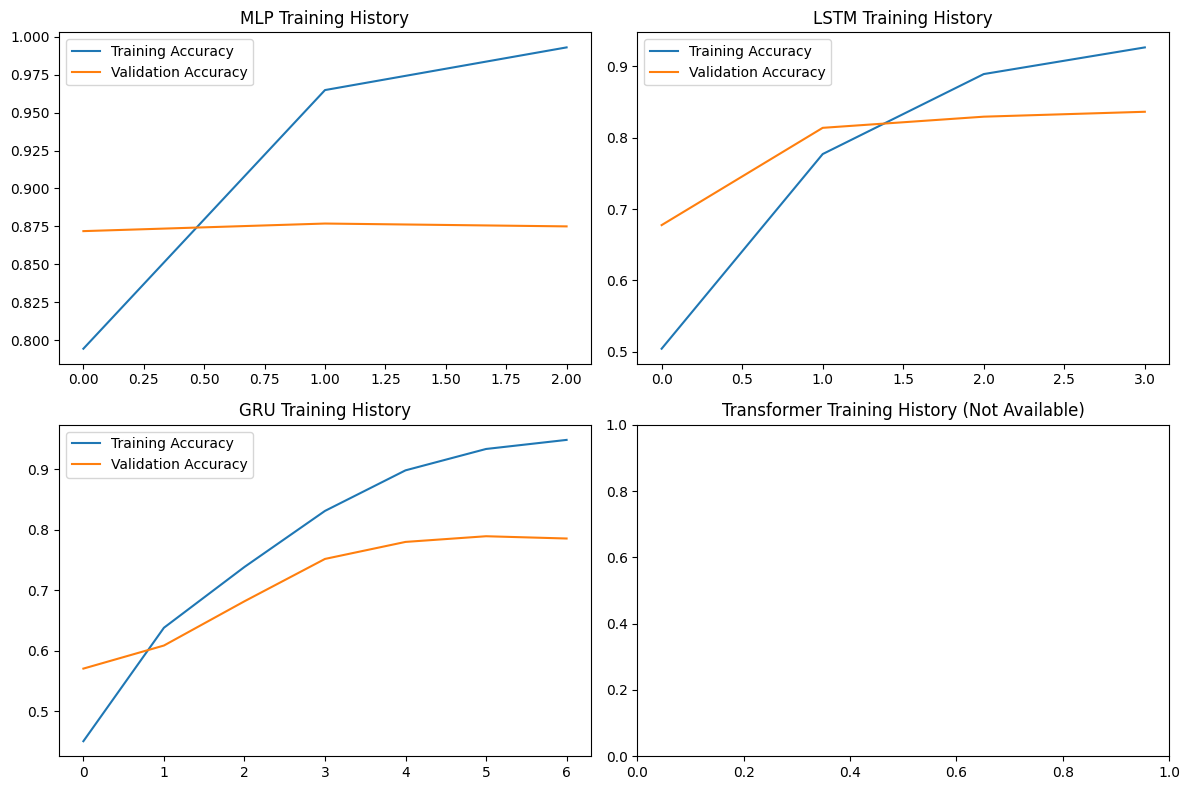


=== Final Model Comparison ===
MLP: 0.8805
LSTM: 0.8360
GRU: 0.7995
Transformer: 0.1880


In [10]:
# Set seeds for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)

set_seed()

# Load AG News dataset
def load_data():
    dataset = load_dataset("ag_news")
    train_df = pd.DataFrame(dataset['train'])
    test_df = pd.DataFrame(dataset['test'])
    return train_df, test_df

# EDA function
def perform_eda(df):
    print("Dataset Shape:", df.shape)
    print("\nLabel distribution:\n", df['label'].value_counts())

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    df['label'].value_counts().plot(kind='bar')
    plt.title('Class Distribution')
    plt.xticks(rotation=0)

    plt.subplot(2, 2, 2)
    text_lengths = df['text'].apply(len)
    plt.hist(text_lengths, bins=50)
    plt.title('Text Length Distribution')

    plt.subplot(2, 2, 3)
    word_counts = df['text'].apply(lambda x: len(x.split()))
    plt.hist(word_counts, bins=50)
    plt.title('Word Count Distribution')

    plt.subplot(2, 2, 4)
    # Create a temporary DataFrame for the boxplot
    boxplot_df = pd.DataFrame({'label': df['label'], 'word_count': word_counts})
    sns.boxplot(x='label', y='word_count', data=boxplot_df) # Pass the DataFrame to data
    plt.title('Word Count by Class')
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

    return text_lengths, word_counts

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Feature engineering function
def create_features(df):
    df['cleaned_text'] = df['text'].apply(preprocess_text)
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    return df

# MLP Model (Simplified)
def create_mlp_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# LSTM Model (Simplified)
def create_lstm_model(vocab_size, max_len):
    model = Sequential([
        Embedding(vocab_size, 64, input_length=max_len),
        Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# GRU Model (Simplified)
def create_gru_model(vocab_size, max_len):
    model = Sequential([
        Embedding(vocab_size, 64, input_length=max_len),
        Bidirectional(GRU(32, dropout=0.2, recurrent_dropout=0.2)),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Transformer Model - ALTERNATIVE APPROACH
def create_transformer_model():
    print("Creating transformer model with alternative approach...")

    model = None # Initialize model as None

    # Try multiple approaches to avoid the safe_open error and optimizer issues
    try:
        # Approach 1: Try loading with from_pt=True
        model = TFAutoModelForSequenceClassification.from_pretrained(
            'distilbert-base-uncased',
            num_labels=4,
            from_pt=True
        )
        print("Model loaded with from_pt=True approach")

    except Exception as e:
        print(f"Approach 1 failed: {e}")

        try:
            # Approach 2: Try loading without from_pt
            model = TFAutoModelForSequenceClassification.from_pretrained(
                'distilbert-base-uncased',
                num_labels=4
            )
            print("Model loaded without from_pt")

        except Exception as e2:
            print(f"Approach 2 failed: {e2}")

            try:
                # Approach 3: Load from config and build manually
                from transformers import DistilBertConfig
                config = DistilBertConfig.from_pretrained(
                    'distilbert-base-uncased',
                    num_labels=4
                )
                model = TFAutoModelForSequenceClassification.from_config(config)

                # Build model with dummy input if tokenizer is available
                if 'global_tokenizer' in globals() and global_tokenizer is not None:
                    try:
                        dummy_input = global_tokenizer("Building model", return_tensors="tf")
                        model(dummy_input)
                        print("Model built from config")
                    except Exception as e_build:
                        print(f"Failed to build model from config with dummy input: {e_build}")
                        model = None # Reset model if build fails

            except Exception as e3:
                print(f"All loading approaches failed: {e3}")
                model = None # Ensure model is None if all loading fails

    # If all transformer loading failed, create a simple fallback model
    if model is None:
        print("Creating a simple transformer-like fallback model instead")
        model = Sequential([
            Embedding(5000, 128, input_length=64),
            tf.keras.layers.GlobalAveragePooling1D(),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(4, activation='softmax')
        ])
        # Compile the fallback model separately
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model # Return fallback model immediately after compiling


    # If a transformers model was loaded successfully, compile it
    try:
        # Use tf.keras.optimizers.Adam explicitly
        optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
        model.compile(
            optimizer=optimizer,
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
        )
        print("Transformer model compiled successfully")
    except Exception as e_compile:
        print(f"Failed to compile transformer model: {e_compile}")
        # If compilation fails, return None or the fallback model if you prefer
        # For now, we'll let the error propagate if compilation of the loaded model fails.
        # Alternatively, you could set model to None and let the fallback be created.


    return model


# Evaluation function
def evaluate_model(model, X_test, y_test, model_type='mlp'):
    if model_type == 'transformer':
        # Check if it's a fallback model
        if isinstance(model, Sequential):
            # It's our fallback sequential model
            X_test_seq = global_tokenizer_lstm.texts_to_sequences(X_test)
            X_test_pad = pad_sequences(X_test_seq, maxlen=64)
            y_pred = np.argmax(model.predict(X_test_pad, verbose=0), axis=1)
        else:
            # It's a transformers model
            y_pred = []
            batch_size = 8

            for i in range(0, len(X_test), batch_size):
                batch_texts = X_test[i:i+batch_size].tolist()
                # Ensure global_tokenizer is available and not None
                if 'global_tokenizer' in globals() and global_tokenizer is not None:
                    batch_encodings = global_tokenizer(
                        batch_texts,
                        padding=True,
                        truncation=True,
                        max_length=64,
                        return_tensors='tf'
                    )
                    # Check if model is callable before predicting
                    if hasattr(model, 'predict') or hasattr(model, '__call__'):
                         batch_pred = model(batch_encodings).logits
                         y_pred.extend(np.argmax(batch_pred.numpy(), axis=1))
                    else:
                        print("Transformer model is not callable for prediction.")
                        # Handle the case where the model object is not a working model
                        return 0.0 # Return 0 accuracy or raise an error
                else:
                    print("Global tokenizer not available for transformer evaluation.")
                    return 0.0 # Return 0 accuracy or raise an error


            y_pred = np.array(y_pred)
    else:
        y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_type.upper()}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return accuracy

# Main execution
def main():
    print("Loading and preprocessing data...")

    # Load and prepare data (using smaller subset for CPU)
    train_df, test_df = load_data()

    # Use smaller subset for CPU
    train_df = train_df.sample(8000, random_state=42)
    test_df = test_df.sample(2000, random_state=42)

    df = pd.concat([train_df, test_df])

    # EDA
    print("Performing EDA...")
    text_lengths, word_counts = perform_eda(df)

    # Preprocessing and feature engineering
    df = create_features(df)

    # Prepare data
    texts = df['cleaned_text'].values
    labels = df['label'].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        texts, labels, test_size=0.2, random_state=42, stratify=labels
    )

    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}")

    # Early stopping callback
    early_stopping = EarlyStopping(patience=2, restore_best_weights=True)

    # 1. MLP Model
    print("\n=== Training MLP Model ===")
    tokenizer_mlp = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
    tokenizer_mlp.fit_on_texts(X_train)
    X_train_mlp = tokenizer_mlp.texts_to_matrix(X_train, mode='tfidf')
    X_test_mlp = tokenizer_mlp.texts_to_matrix(X_test, mode='tfidf')

    model_mlp = create_mlp_model(5000)
    history_mlp = model_mlp.fit(X_train_mlp, y_train,
                               epochs=8,
                               batch_size=32,
                               validation_split=0.2,
                               callbacks=[early_stopping],
                               verbose=1)

    # 2. LSTM Model
    print("\n=== Training LSTM Model ===")
    global global_tokenizer_lstm  # For fallback transformer if needed
    global_tokenizer_lstm = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
    global_tokenizer_lstm.fit_on_texts(X_train)
    X_train_seq = global_tokenizer_lstm.texts_to_sequences(X_train)
    X_test_seq = global_tokenizer_lstm.texts_to_sequences(X_test)

    max_len = 100
    X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_len)
    X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_len)

    model_lstm = create_lstm_model(5000, max_len)
    history_lstm = model_lstm.fit(X_train_pad, y_train,
                                 epochs=8,
                                 batch_size=32,
                                 validation_split=0.2,
                                 callbacks=[early_stopping],
                                 verbose=1)

    # 3. GRU Model
    print("\n=== Training GRU Model ===")
    model_gru = create_gru_model(5000, max_len)
    history_gru = model_gru.fit(X_train_pad, y_train,
                               epochs=8,
                               batch_size=32,
                               validation_split=0.2,
                               callbacks=[early_stopping],
                               verbose=1)

    # 4. Transformer Model (DistilBERT)
    print("\n=== Training Transformer Model ===")
    global global_tokenizer
    try:
        global_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
    except Exception as e:
        print(f"Failed to load DistilBertTokenizer: {e}, using fallback...")
        # Create a simple tokenizer for fallback
        global_tokenizer = None # Set to None if DistilBertTokenizer fails to load


    # Use smaller subset for transformer
    sample_size = min(2000, len(X_train))
    X_train_subset = X_train[:sample_size]
    y_train_subset = y_train[:sample_size]
    X_test_subset = X_test[:min(500, len(X_test))]
    y_test_subset = y_test[:min(500, len(X_test))]

    # Create and train the transformer model
    model_tf = create_transformer_model()

    # Only train if it's a transformers model (not the fallback sequential model)
    if not isinstance(model_tf, Sequential):
        # Tokenize the data for transformers model
        if global_tokenizer is not None:
            try:
                train_encodings = global_tokenizer(
                    X_train_subset.tolist(),
                    padding=True,
                    truncation=True,
                    max_length=64,
                    return_tensors='tf'
                )

                history_tf = model_tf.fit(
                    dict(train_encodings),
                    y_train_subset,
                    epochs=2,
                    batch_size=8,
                    validation_split=0.2,
                    verbose=1
                )
            except Exception as e_train_tf:
                 print(f"Error during Transformer model training: {e_train_tf}")
                 history_tf = None # Set history to None if training fails
        else:
            print("Transformer tokenizer not available, skipping transformer training.")
            history_tf = None # Set history to None if tokenizer is not available


    else:
        # For fallback model, use the same preprocessing as LSTM/GRU
        print("Using fallback model for training.")
        if global_tokenizer_lstm is not None:
            try:
                X_train_seq = global_tokenizer_lstm.texts_to_sequences(X_train_subset)
                X_train_pad_subset = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=64)

                history_tf = model_tf.fit(
                    X_train_pad_subset,
                    y_train_subset,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1
                )
            except Exception as e_train_fallback:
                print(f"Error during fallback model training: {e_train_fallback}")
                history_tf = None # Set history to None if training fails
        else:
             print("Fallback tokenizer not available, skipping fallback model training.")
             history_tf = None


    # Evaluate all models
    print("\n=== Model Evaluation ===\n")

    print("MLP Evaluation:")
    mlp_accuracy = evaluate_model(model_mlp, X_test_mlp, y_test, 'mlp')

    print("LSTM Evaluation:")
    lstm_accuracy = evaluate_model(model_lstm, X_test_pad, y_test, 'lstm')

    print("GRU Evaluation:")
    gru_accuracy = evaluate_model(model_gru, X_test_pad, y_test, 'gru')

    print("Transformer Evaluation:")
    # Pass the subset of y_test used for transformer evaluation
    tf_accuracy = evaluate_model(model_tf, X_test_subset, y_test_subset, 'transformer')

    # Model Comparison
    dl_results = {
        'MLP': mlp_accuracy,
        'LSTM': lstm_accuracy,
        'GRU': gru_accuracy,
        # Only include Transformer results if the model was loaded successfully and evaluated
        'Transformer': tf_accuracy if not isinstance(model_tf, Sequential) or (isinstance(model_tf, Sequential) and tf_accuracy > 0) else 0.0
    }

    best_dl_model = max(dl_results, key=dl_results.get)
    print(f"\nBest Deep Learning Model: {best_dl_model} with Accuracy: {dl_results[best_dl_model]:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history_mlp.history:
        plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
    plt.title('MLP Training History')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history_lstm.history:
        plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
    plt.title('LSTM Training History')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(history_gru.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history_gru.history:
        plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
    plt.title('GRU Training History')
    plt.legend()

    plt.subplot(2, 2, 4)
    # Plot Transformer history only if it exists
    if history_tf is not None and hasattr(history_tf, 'history') and 'accuracy' in history_tf.history:
        plt.plot(history_tf.history['accuracy'], label='Training Accuracy')
        if 'val_accuracy' in history_tf.history:
            plt.plot(history_tf.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Transformer Training History')
        plt.legend()
    else:
        plt.title('Transformer Training History (Not Available)')


    plt.tight_layout()
    plt.show()

    # Print final comparison
    print("\n=== Final Model Comparison ===")
    for model_name, accuracy in dl_results.items():
        print(f"{model_name}: {accuracy:.4f}")

if __name__ == "__main__":
    main()